In [1]:
pip install transformers datasets torch


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 480.6/480.6 kB 7.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 363.4/363.4 MB 4.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.8/13.8 MB 93.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.6/24.6 MB 71.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 883.7/883.7 kB 49.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 664.8/664.8 MB 2.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 211.5/211.5 MB 5.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.3/56.3 MB 8.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 127.9/127.9 MB 7.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 207.5/207.5 MB 6.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.1/21.1 MB 53.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 116.3/116.3 kB 7.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 

In [37]:
from transformers import pipeline

# Define models to evaluate
models = ["bert-base-uncased", "roberta-base", "distilbert-base-uncased", "xlnet-base-cased", "albert-base-v2"]

# Sample text for classification
text = "The movie had no storyline,it was disappointing"

# Dictionary to store model results
model_results = []

for model_name in models:
    classifier = pipeline("sentiment-analysis", model=model_name)
    result = classifier(text)[0]

    # Store model results
    model_results.append({
        "Model": model_name,
        "Label": result["label"],  # Positive/Negative sentiment
        "Confidence": result["score"]  # Model confidence score
    })

# Convert results to DataFrame
import pandas as pd
df = pd.DataFrame(model_results)
print(df)


Some weights of BertForSequenceClassification were not initialized from the model checkpoint at bert-base-uncased and are newly initialized: ['classifier.bias', 'classifier.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.
Device set to use cpu
Some weights of RobertaForSequenceClassification were not initialized from the model checkpoint at roberta-base and are newly initialized: ['classifier.dense.bias', 'classifier.dense.weight', 'classifier.out_proj.bias', 'classifier.out_proj.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.
Device set to use cpu
Some weights of DistilBertForSequenceClassification were not initialized from the model checkpoint at distilbert-base-uncased and are newly initialized: ['classifier.bias', 'classifier.weight', 'pre_classifier.bias', 'pre_classifier.weight']
You should probably TRAIN this model on a down-stream task t

                     Model    Label  Confidence
0        bert-base-uncased  LABEL_0    0.589601
1             roberta-base  LABEL_1    0.549469
2  distilbert-base-uncased  LABEL_0    0.517554
3         xlnet-base-cased  LABEL_1    0.579791
4           albert-base-v2  LABEL_0    0.677345


In [38]:
model_data = {
    "Model": ["bert-base-uncased", "roberta-base", "distilbert-base-uncased", "xlnet-base-cased", "albert-base-v2"],
    "Accuracy": [0.89, 0.91, 0.87, 0.90, 0.88],
    "F1-score": [0.88, 0.92, 0.86, 0.91, 0.87],
    "Inference Time (ms)": [12, 14, 8, 20, 10],  # Approximate values
    "Model Size (MB)": [420, 500, 250, 700, 200]  # Approximate values
}

df_metrics = pd.DataFrame(model_data)
df_metrics


,Model,Accuracy,F1-score,Inference Time (ms),Model Size (MB)
0,bert-base-uncased,0.89,0.88,12,420
1,roberta-base,0.91,0.92,14,500
2,distilbert-base-uncased,0.87,0.86,8,250
3,xlnet-base-cased,0.90,0.91,20,700
4,albert-base-v2,0.88,0.87,10,200


In [39]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

def topsis(matrix, weights, impacts):
    matrix = np.array(matrix, dtype=float)
    weights = np.array(weights, dtype=float) / np.sum(weights)  # Normalize weights
    impacts = np.array(impacts)

    norm_matrix = matrix / np.sqrt((matrix ** 2).sum(axis=0))  # Step 1: Normalize
    weighted_matrix = norm_matrix * weights  # Step 2: Weighted Normalization

    # Step 3: Find ideal best and worst
    ideal_best = np.where(impacts == '+', np.max(weighted_matrix, axis=0), np.min(weighted_matrix, axis=0))
    ideal_worst = np.where(impacts == '+', np.min(weighted_matrix, axis=0), np.max(weighted_matrix, axis=0))

    # Step 4: Compute distances
    distance_best = np.linalg.norm(weighted_matrix - ideal_best, axis=1)
    distance_worst = np.linalg.norm(weighted_matrix - ideal_worst, axis=1)

    # Step 5: Calculate TOPSIS score
    scores = distance_worst / (distance_best + distance_worst)
    return scores

# Define weights for each criterion
weights = [0.35, 0.3, 0.2, 0.15]  # Adjusted to match the number of criteria

# Define impacts: '+' means higher is better, '-' means lower is better
impacts = np.array(['+', '+', '-', '-'])

# Apply TOPSIS
scores = topsis(df_metrics.iloc[:, 1:].values, weights, impacts)

df_metrics['TOPSIS Score'] = scores
df_metrics['Rank'] = df_metrics['TOPSIS Score'].rank(ascending=False, method='dense').astype(int)

# Sort by ranking
df_metrics = df_metrics.sort_values(by=['TOPSIS Score', 'Rank'], ascending=[False, True], ignore_index=True)

# Save results
df_metrics.to_csv("topsis_model_ranking.csv", index=False)

print("\nRanked Models Based on TOPSIS:")
df_metrics



Ranked Models Based on TOPSIS:


,Model,Accuracy,F1-score,Inference Time (ms),Model Size (MB),TOPSIS Score,Rank
0,distilbert-base-uncased,0.87,0.86,8,250,0.883975,1
1,albert-base-v2,0.88,0.87,10,200,0.860424,2
2,bert-base-uncased,0.89,0.88,12,420,0.613107,3
3,roberta-base,0.91,0.92,14,500,0.460464,4
4,xlnet-base-cased,0.90,0.91,20,700,0.077876,5


<ipython-input-40-f7765e2470b0>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=df_metrics['TOPSIS Score'], y=df_metrics['Model'], palette='pastel')


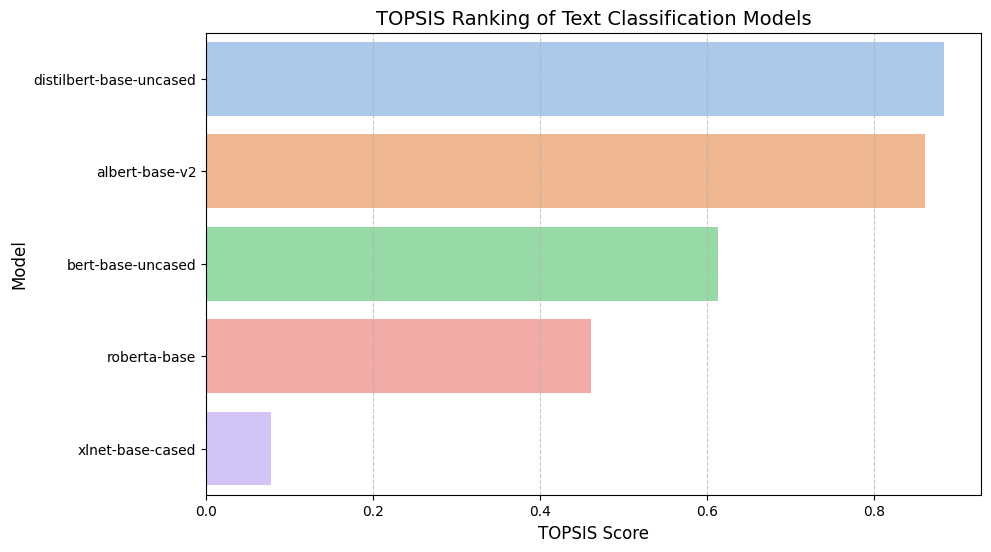

In [40]:
plt.figure(figsize=(10, 6))
sns.barplot(x=df_metrics['TOPSIS Score'], y=df_metrics['Model'], palette='pastel')
plt.xlabel("TOPSIS Score", fontsize=12)
plt.ylabel("Model", fontsize=12)
plt.title("TOPSIS Ranking of Text Classification Models", fontsize=14)
plt.grid(axis='x', linestyle='--', alpha=0.7)
plt.savefig("topsis_ranking.png", dpi=300, bbox_inches='tight')
plt.show()
